<a href="https://colab.research.google.com/github/TeddyProg/ML_workbooks/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libs, mounting drive

In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import data_table
data_table.enable_dataframe_formatter()

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Loading data

In [ ]:

data2023 = pd.read_csv('/content/drive/MyDrive/ZNO_data/Odata2023File.csv', on_bad_lines='warn', engine = 'c', header = 0, sep=';')

Formatting dataframe

In [ ]:
subjectGradesColumnNames = [ 'UkrBlockBall100',
                             'HistBlockBall100',
                             'MathBlockBall100',
                             'PhysBlockBall100',
                             'ChemBlockBall100',
                             'BioBlockBall100',
                             'EngBlockBall100',
                             'FraBlockBall100',
                             'DeuBlockBall100',
                             'SpaBlockBall100'
                             ]

allData = [
    data2023,
]

for data in allData:
  for subjectGrade in subjectGradesColumnNames:

    if data[subjectGrade].dtype != np.float64:
      data[subjectGrade] = data[subjectGrade].str.replace(',','.')
      data[subjectGrade] = data[subjectGrade].astype(np.float64)



Helper functions

In [ ]:
def setup_histogram_style(ax):
  ax.set_facecolor('#E6E6E6')
  ax.set_axisbelow(True)
  # draw solid white grid lines
  ax.grid(color='w', linestyle='solid')
  # hide axis spines
  for spine in ax.spines.values():
    spine.set_visible(False)
  # hide top and right ticks
  ax.xaxis.tick_bottom()
  ax.yaxis.tick_left()
  # lighten ticks and labels
  ax.tick_params(colors='gray', direction='out')
  for tick in ax.get_xticklabels():
    tick.set_color('gray')
  for tick in ax.get_yticklabels():
    tick.set_color('gray')

def getGradesAndNamesArrays(data, gradeArrayNames):
  gradeArrays = []
  subjectsNames = []
  for subjName in gradeArrayNames:
    neededData = data[subjName].dropna()
    neededData = neededData[neededData >= 100] #filtering out probably wrong data or result from someone who didn`t attend the test (?)
    if neededData.shape[0] > 0:
      gradeArrays.append(neededData)
      subjectsNames.append(subjName)
  return gradeArrays, subjectsNames

def getUkrainianSubjectName(gradeColumnName100):
  if gradeColumnName100 == 'UkrBlockBall100':
    return 'Українська мова'
  if gradeColumnName100 == 'HistBlockBall100':
    return 'Історія'
  if gradeColumnName100 == 'MathBlockBall100':
    return 'Математика'
  if gradeColumnName100 == 'PhysBlockBall100':
    return 'Фізика'
  if gradeColumnName100 == 'ChemBlockBall100':
    return 'Хімія'
  if gradeColumnName100 == 'BioBlockBall100':
    return 'Біологія'
  if gradeColumnName100 == 'EngBlockBall100':
    return 'Англійська мова'
  if gradeColumnName100 == 'FraBlockBall100':
    return 'Французька мова'
  if gradeColumnName100 == 'DeuBlockBall100':
    return 'Німецька мова'
  if gradeColumnName100 == 'SpaBlockBall100':
    return 'Іспанська мова'

  return 'Невідомий предмет'

def getUkrainianSubjectNames(gradeColumnNames100):
  subjectUkrNames = [ getUkrainianSubjectName(gradeColumnNames100[i]) for i in range(0, len(gradeColumnNames100)) ]
  return subjectUkrNames

def getCompulsorySubjects():
  return ['Українська мова', 'Математика']

def getCompulsorySubjectsColumnNames():
  return ['UkrBlockBall100', 'MathBlockBall100']

Let`s check how many people have high and low grades in each subject

In [ ]:
gradeArrays, subjectNames = getGradesAndNamesArrays(data2023, subjectGradesColumnNames)
subjectNames = getUkrainianSubjectNames(subjectNames)
numSubjects = len(gradeArrays)

threshoulds = [100, 150, 190, 200]
labels = ['Задовільно', 'Добре', 'Відмінно']

peopleCounts = np.array([gradeArray.shape[0] for gradeArray in gradeArrays])
gradesMatrix = np.zeros(shape = (len(subjectNames), len(labels)), dtype = int)
gradesPercentageMatrix = np.zeros(shape = (len(subjectNames), len(labels)), dtype = float)
gradesDF = pd.DataFrame(index = subjectNames, columns = labels)
for i in range(0, numSubjects):
  gradesMatrix[i], _ = np.histogram(gradeArrays[i], threshoulds)
  gradesPercentageMatrix[i] = np.round(gradesMatrix[i] / peopleCounts[i] * 100, 2)

for i in range(0, len(labels)):
  gradesDF[labels[i]] = gradesMatrix.T[i]
  gradesDF[labels[i] + ', %'] = gradesPercentageMatrix.T[i]

print('Предмет з найбільшим відсотком відмінників: ')
highGradeMaxPercentIdx = gradesPercentageMatrix.T[2].argmax()
print('{0} - {1} %'.format(subjectNames[highGradeMaxPercentIdx], gradesPercentageMatrix.T[2][highGradeMaxPercentIdx]))
print('Кількість людей, що отримали таку оцінку: {0} з {1}'.format(gradesMatrix.T[2][highGradeMaxPercentIdx], peopleCounts[highGradeMaxPercentIdx]))

print('Предмет з найменшим відсотком відмінників: ')
gradeMinPercentIdx = gradesPercentageMatrix.T[2].argmin()
print('{0} - {1} %'.format(subjectNames[gradeMinPercentIdx], gradesPercentageMatrix.T[2][gradeMinPercentIdx]))
print('Кількість людей, що отримали таку оцінку: {0} з {1}'.format(gradesMatrix.T[2][gradeMinPercentIdx], peopleCounts[gradeMinPercentIdx]))

gradesDF


Предмет з найбільшим відсотком відмінників: 
Англійська мова - 3.48 %
Кількість людей, що отримали таку оцінку: 2779 з 79814
Предмет з найменшим відсотком відмінників: 
Історія - 0.92 %
Кількість людей, що отримали таку оцінку: 1301 з 140844


,Задовільно,Добре,Відмінно,"Задовільно, %","Добре, %","Відмінно, %"
Українська мова,157878,103625,6368,58.94,38.68,2.38
Історія,111519,28024,1301,79.18,19.90,0.92
Математика,201603,51713,3425,78.52,20.14,1.33
Фізика,3763,1209,64,74.72,24.01,1.27
Хімія,2114,1011,81,65.94,31.53,2.53
Біологія,24516,10819,609,68.21,30.10,1.69
Англійська мова,35030,42005,2779,43.89,52.63,3.48
Французька мова,157,111,4,57.72,40.81,1.47
Німецька мова,859,983,47,45.47,52.04,2.49
Іспанська мова,66,75,5,45.21,51.37,3.42


Displaying different subjects histograms

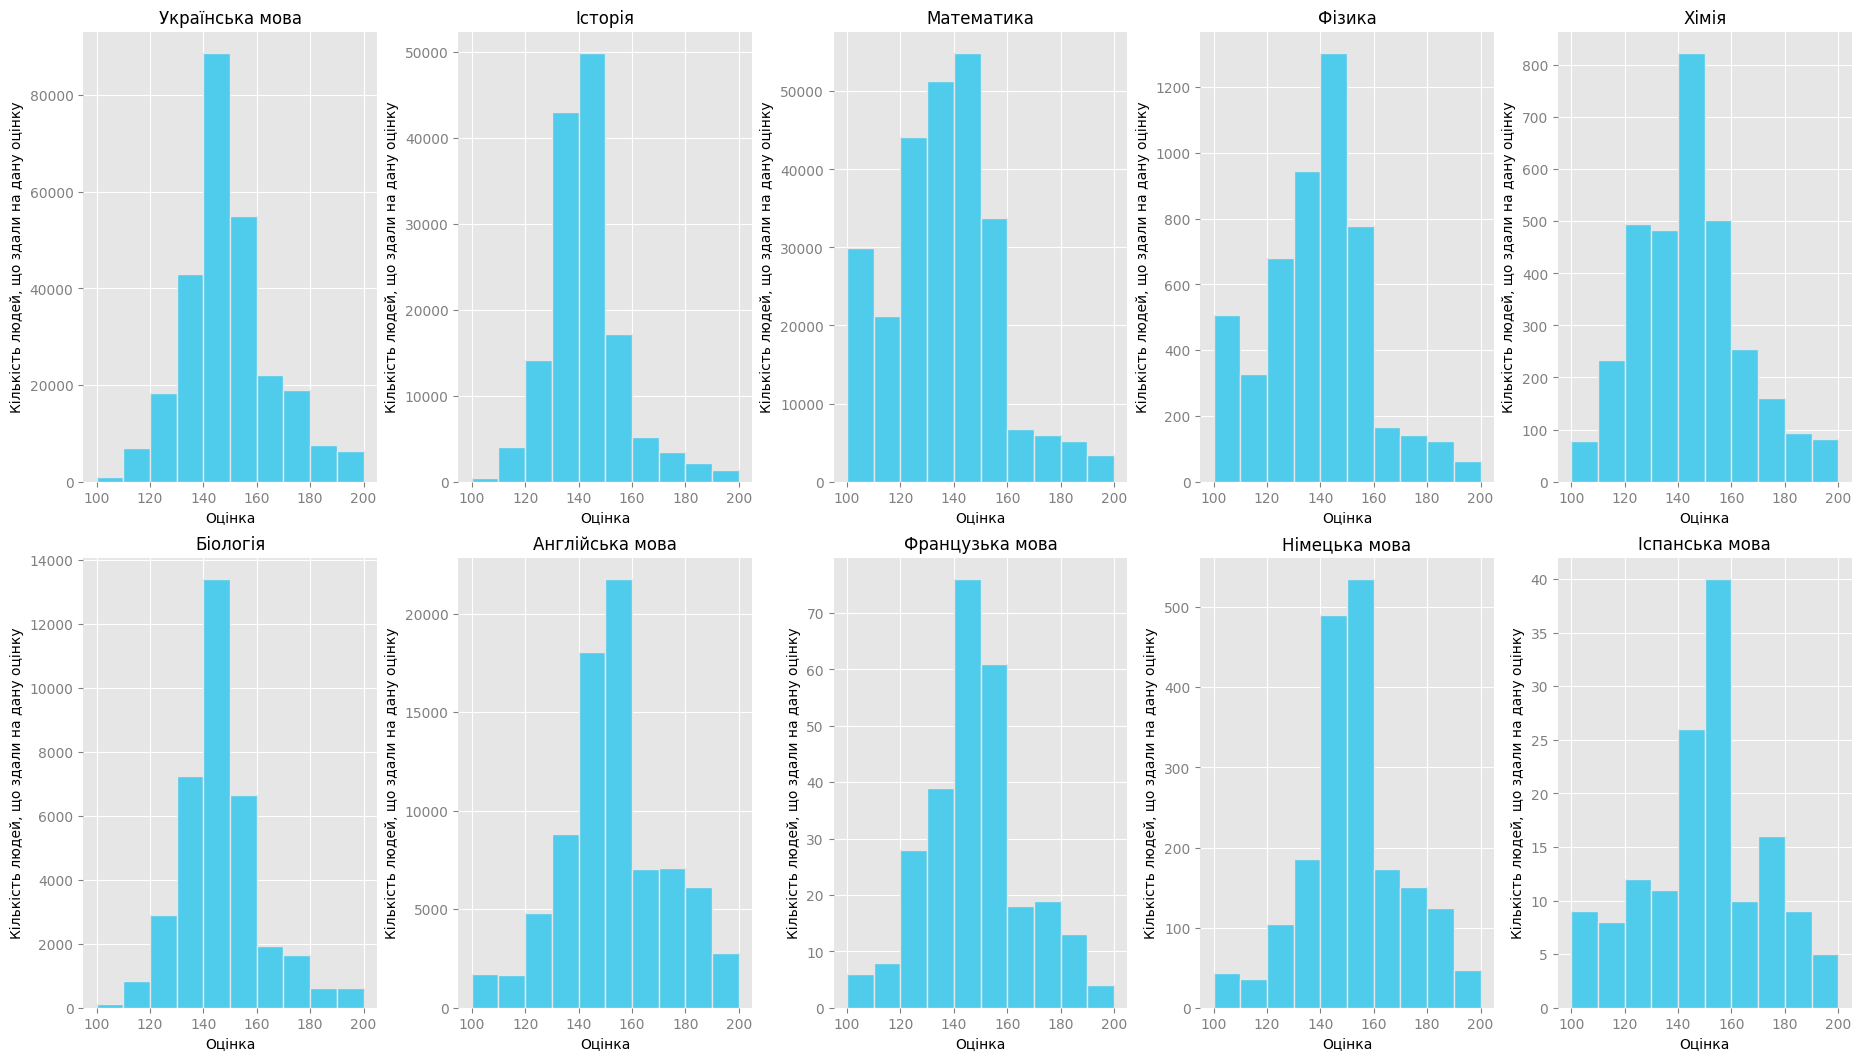

In [ ]:
def getHistograms(gradeArrays):
  minGrade = 100
  maxGrade = 200
  numBins = 10
  step = (maxGrade - minGrade) / numBins
  bins = np.arange(minGrade, maxGrade + step, step)
  gradeHists = []

  for i in range(0, len(gradeArrays)):
    hist, _ = np.histogram(gradeArrays[i], bins)
    gradeHists.append(hist)

  return gradeHists, bins

gradeArrays, subjectNames = getGradesAndNamesArrays(data2023, subjectGradesColumnNames)
gradeHists, bins = getHistograms(gradeArrays)

numHists = len(gradeHists)
numPlotRows = 2
numPlotCols = (len(gradeHists) + numPlotRows - 1) // numPlotRows # ceiling column num

fig, axs = plt.subplots(nrows = numPlotRows, ncols = numPlotCols, constrained_layout=True)
fig.set_size_inches(18.5, 10.5)
for i in range(0, numHists):
  r = i // numPlotCols
  c = i % numPlotCols

  ax = axs[r, c]
  setup_histogram_style(ax)
  ax.bar(bins[:-1], gradeHists[i], width=np.diff(bins), align="edge", edgecolor='#E6E6E6', color='#4FCBEC')
  ax.set_title(getUkrainianSubjectName(subjectNames[i]))
  ax.set_ylabel('Кількість людей, що здали на дану оцінку')
  ax.set_xlabel('Оцінка')

Lets see chosen subjects popularity

Список обраних предметів за популярністю:
Історія - 140844 / 267151, 52.72 %
Англійська мова - 79814 / 267151, 29.88 %
Біологія - 35944 / 267151, 13.45 %
Фізика - 5036 / 267151, 1.89 %
Хімія - 3206 / 267151, 1.2 %
Німецька мова - 1889 / 267151, 0.71 %
Французька мова - 272 / 267151, 0.1 %
Іспанська мова - 146 / 267151, 0.05 %


Text(0, 0.5, 'Кількість людей, які обрали цей предмет')

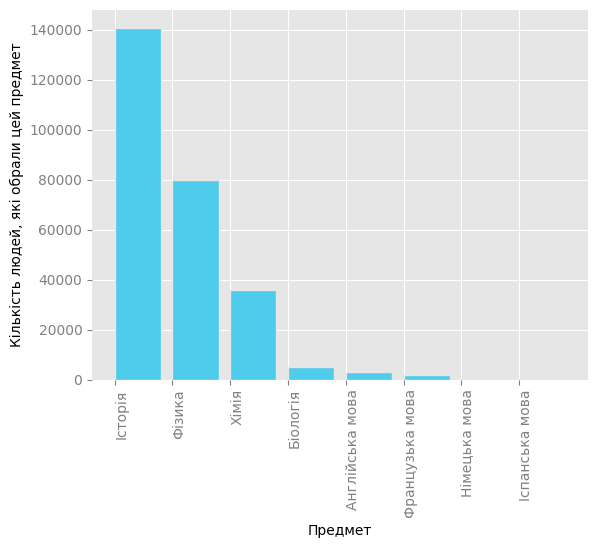

In [ ]:
gradeArrays, subjectNames = getGradesAndNamesArrays(data2023, subjectGradesColumnNames)
subjectNames = np.array(getUkrainianSubjectNames(subjectNames))
compulsorySubjects = np.array(getCompulsorySubjects())
chosenSubjectsMask = ~np.in1d(subjectNames, compulsorySubjects)
chosenSubjectsNames = subjectNames[chosenSubjectsMask]
chosenSubjectsGrades = [ gradeArrays[i] for i in range(0, len(gradeArrays)) if  chosenSubjectsMask[i]]
chosenSubjectsNum = chosenSubjectsNames.shape[0]
chosenSubjectsCounts = np.array([ chosenSubjectsGrades[i].shape[0] for i in range(0, chosenSubjectsNum)])
chosenSubjectAllCount = chosenSubjectsCounts.sum()
popularitySortedIdx = chosenSubjectsCounts.argsort()[::-1]

print('Список обраних предметів за популярністю:')
for i in range(0, chosenSubjectsNum):
  idx = popularitySortedIdx[i]
  print('{0} - {1} / {2}, {3} %'.format(chosenSubjectsNames[idx], chosenSubjectsCounts[idx], chosenSubjectAllCount, np.round(chosenSubjectsCounts[idx] / chosenSubjectAllCount * 100, 2)))

fig, ax = plt.subplots()
setup_histogram_style(ax)
ax.set_xticks(np.arange(chosenSubjectsNum), chosenSubjectsNames, rotation='vertical', ha='left')
ax.bar(chosenSubjectsNames[popularitySortedIdx], chosenSubjectsCounts[popularitySortedIdx], align="edge", edgecolor='#E6E6E6', color='#4FCBEC')
ax.set_xlabel('Предмет')
ax.set_ylabel('Кількість людей, які обрали цей предмет')


Lets compare how good boys and girls at different subject. Let`s check in which subjects boys have better average grade in comparison to girls

Кількість хлопців - 139994, кількість дівчат - 148941
Хлопці кращі за дівчат в таких предметах: 
Математика                - 135.50 проти 135.30 (різниця  0.20 балів)
Фізика                    - 138.26 проти 137.66 (різниця  0.60 балів)
Хімія                     - 145.38 проти 142.46 (різниця  2.92 балів)
Дівчата кращі за хлопців в таких предметах: 
Українська мова           - 151.81 проти 144.94 (різниця  6.86 балів)
Історія                   - 142.93 проти 140.45 (різниця  2.48 балів)
Біологія                  - 146.89 проти 143.75 (різниця  3.14 балів)
Англійська мова           - 154.15 проти 150.88 (різниця  3.26 балів)
Французька мова           - 148.03 проти 145.55 (різниця  2.48 балів)
Німецька мова             - 152.96 проти 150.04 (різниця  2.92 балів)
Іспанська мова            - 152.11 проти 144.55 (різниця  7.56 балів)


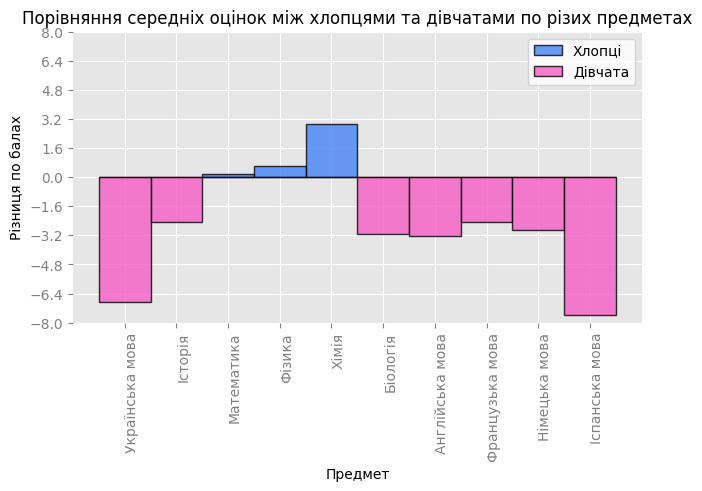

In [ ]:
def getGenderGradesDict(data):
  grades, subjNames = getGradesAndNamesArrays(data, subjectGradesColumnNames)
  gradesDict = { getUkrainianSubjectName(subjNames[i]) : np.mean(grades[i]) for i in range(0, len(subjNames)) }
  return gradesDict

maleGender = 'чоловіча'
femaleGender = 'жіноча'

maleData = data2023[data2023['SexTypeName'] == maleGender]
femaleData = data2023[data2023['SexTypeName'] == femaleGender]

maleGradesDict = getGenderGradesDict(maleData)
femaleGradesDict = getGenderGradesDict(femaleData)

maleCount = maleData.shape[0]
femaleCount = femaleData.shape[0]
print('Кількість хлопців - {0}, кількість дівчат - {1}'.format(maleCount, femaleCount))

subjectsMale = np.array(list(maleGradesDict.keys()))
subjectsFemale = np.array(list(femaleGradesDict.keys()))
subjects = subjectsMale[np.in1d(subjectsMale, subjectsFemale)]

maleGrades = np.array([maleGradesDict[subjects[i]] for i in range(0, len(subjects))])
femaleGrades = np.array([femaleGradesDict[subjects[i]] for i in range(0, len(subjects))])
diff = maleGrades - femaleGrades


maleBetterIds = np.nonzero(diff > 0)[0]
print('Хлопці кращі за дівчат в таких предметах: ')
for i in range(0, maleBetterIds.shape[0]):
  idx = maleBetterIds[i]
  print(f'{subjects[idx]:25} - {maleGrades[idx]:5.2f} проти {femaleGrades[idx]:5.2f} (різниця {diff[idx]:5.2f} балів)')

femaleBetterIds = np.nonzero(diff < 0)[0]
print('Дівчата кращі за хлопців в таких предметах: ')
for i in range(0, femaleBetterIds.shape[0]):
  idx = femaleBetterIds[i]
  print(f'{subjects[idx]:25} - {femaleGrades[idx]:5.2f} проти {maleGrades[idx]:5.2f} (різниця {-diff[idx]:5.2f} балів)')


fig, ax = plt.subplots(constrained_layout=True)
setup_histogram_style(ax)
ax.set_xticks(np.arange(subjects.shape[0]), subjects, rotation='vertical', ha='left')
yAxisEdge = np.ceil(np.abs(diff).max())
step = yAxisEdge / 5
ax.set_yticks(np.arange(-yAxisEdge, yAxisEdge + step, step))
ax.set_ylim(-yAxisEdge, yAxisEdge)
ax.set_title('Порівняння середніх оцінок між хлопцями та дівчатами по різих предметах')
ax.bar(subjects, np.where(diff > 0, diff, 0), width=1, color='#4284f5', label = 'Хлопці', alpha=0.8, edgecolor='k', linewidth=1)
ax.bar(subjects, np.where(diff < 0, diff, 0), width=1, color='#f55dc5', label = 'Дівчата', alpha=0.8, edgecolor='k', linewidth=1)
ax.set_xlabel('Предмет')
ax.set_ylabel('Різниця по балах')
ax.legend()

Let`s see dependency of chosen subjects grades and compulsory subjects. We will check pearson correlation coefficient of average grades of compulsory subjects and grades of chosen subject

Коефіцієнт кореляції Пірсона між оцінками за обов`язкові дисципліни та обрані рівний 0.6883211967868132
Між цими оцінками можна простежити певну залежність


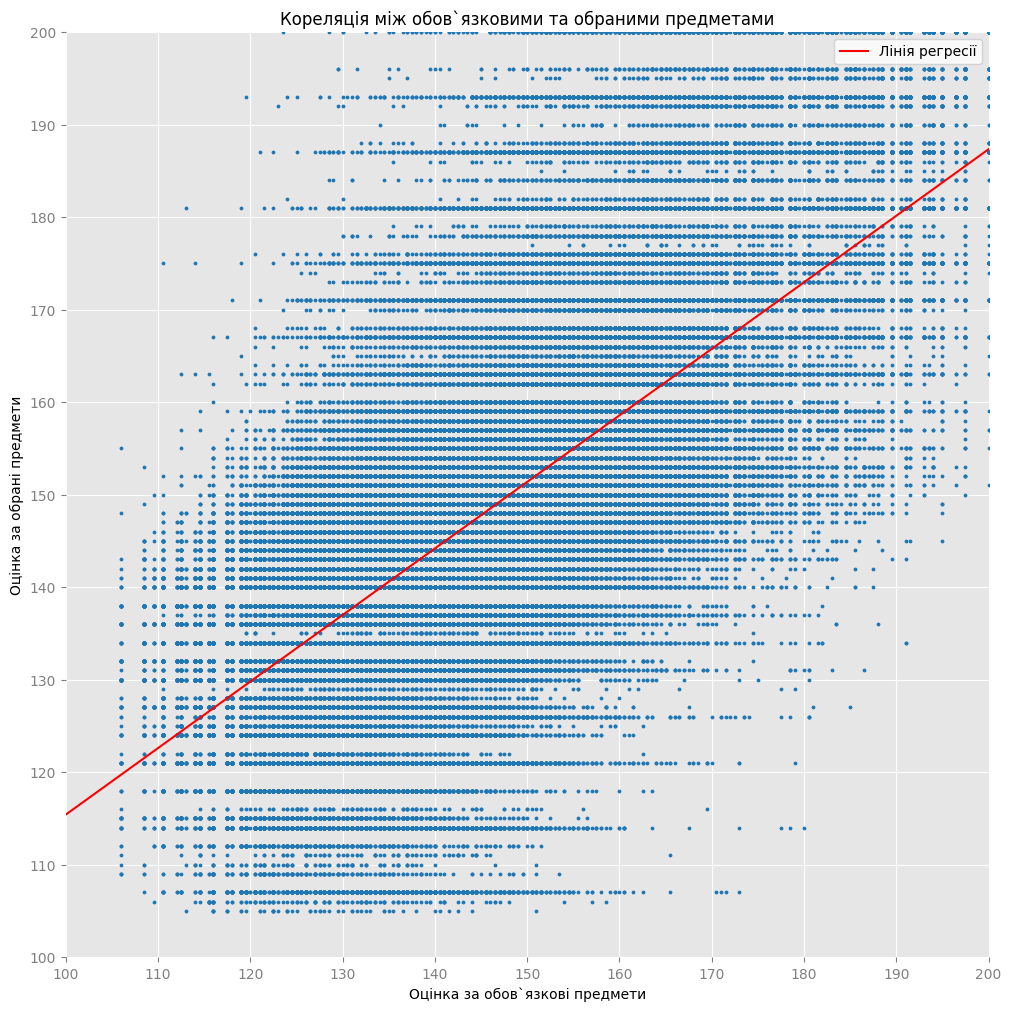

In [ ]:
compulsorySubjectNames = getCompulsorySubjectsColumnNames()
subjectsData = data2023[subjectGradesColumnNames]

subjectsData = subjectsData.dropna(thresh = 3)
for subj in subjectGradesColumnNames:
  subjectsData = subjectsData[(subjectsData[subj] > 100) | (subjectsData[subj].isna())]

compulsorySubjectsData = subjectsData[compulsorySubjectNames]
chosenSubjectsData = subjectsData.loc[ :, ~np.in1d(subjectsData.columns, compulsorySubjectNames)]

compulsorySubjectsAvgGrades = subjectsData[compulsorySubjectNames].mean(axis = 1).to_numpy()
chosenSubjectsGrades = chosenSubjectsData.mean(axis = 1, skipna = True).to_numpy()


corrCoeff = np.corrcoef(compulsorySubjectsAvgGrades, chosenSubjectsGrades)[0,1]
print(f'Коефіцієнт кореляції Пірсона між оцінками за обов`язкові дисципліни та обрані рівний {corrCoeff}')
if corrCoeff > 0.4:
  print('Між цими оцінками можна простежити певну залежність')
else:
  print('Залежність не виглядає наявною')

fig, ax = plt.subplots(constrained_layout=True)
fig.set_size_inches(10, 10)
setup_histogram_style(ax)
ax.scatter(compulsorySubjectsAvgGrades, chosenSubjectsGrades, s = 3)
ax.set_yticks(np.arange(100, 201, 10))
ax.set_xticks(np.arange(100, 201, 10))
ax.set_ylim(100, 200)
ax.set_xlim(100, 200)
ax.set_xlabel('Оцінка за обов`язкові предмети')
ax.set_ylabel('Оцінка за обрані предмети')
ax.set_title('Кореляція між обов`язковими та обраними предметами')


lineCoeffs = np.polyfit(compulsorySubjectsAvgGrades, chosenSubjectsGrades, 1)
xs = np.array([100, 200])
ys = lineCoeffs[0] * xs + lineCoeffs[1]
ax.plot(xs, ys, color = 'r', label = 'Лінія регресії')
ax.legend()
